# Estadistica Aplicada

## Sesión 12, 11septiembre

### Ricardo de Jesús Cervantes García G41

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [6]:
datos=pd.read_excel('ejercicio_km.xlsx')

In [7]:
datos

,individuo,tiempo,evento,Unnamed: 3,Unnamed: 4
0,1,6,1,NaN,NaN
1,2,6,1,NaN,NaN
2,3,6,1,NaN,NaN
3,4,7,1,NaN,NaN
4,5,10,1,NaN,NaN
5,6,13,1,NaN,NaN
6,7,16,1,NaN,NaN
7,8,22,1,NaN,NaN
8,9,23,1,NaN,NaN
9,10,6,0,NaN,NaN


In [8]:
km1=KaplanMeierFitter().fit(datos['tiempo'],datos['evento'])

In [9]:
km1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,21,21
6.0,4,3,1,0,21
7.0,1,1,0,0,17
9.0,1,0,1,0,16
10.0,2,1,1,0,15
11.0,1,0,1,0,13
13.0,1,1,0,0,12
16.0,1,1,0,0,11
17.0,1,0,1,0,10


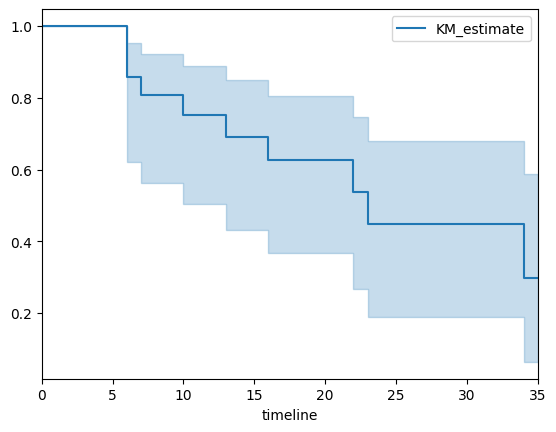

In [15]:
km1.plot_survival_function()
plt.xlim(0,35);

In [13]:
km1.median_survival_time_

23.0

significa que el tiempo 23 a la mitad de los individuos les ha ocurrido el evento.

In [16]:
relacion=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

In [25]:
relacion

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1
5,0,4,1
6,0,4,1
7,0,5,1
8,0,5,1
9,0,8,1


In [19]:
km_all=KaplanMeierFitter().fit(relacion['t'],relacion['estado'])

(0.0, 35.0)

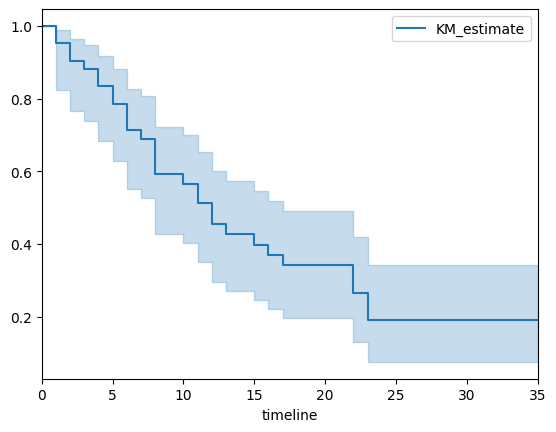

In [23]:
km_all.plot_survival_function()
plt.xlim(0,35)

In [24]:
km_all.median_survival_time_

12.0

In [26]:
detallista=relacion.query('tratamiento==1')
no_detallista=relacion.query('tratamiento==0')

In [29]:
km_det=KaplanMeierFitter().fit(detallista['t'],detallista['estado'])
km_nodet=KaplanMeierFitter().fit(no_detallista['t'],no_detallista['estado'])

(0.0, 35.0)

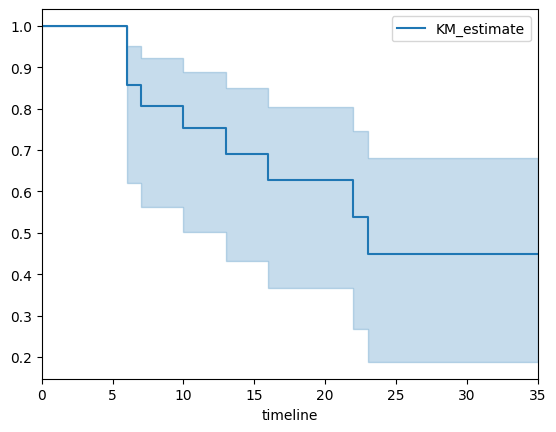

In [30]:
km_det.plot_survival_function()
plt.xlim(0,35)

(0.0, 25.0)

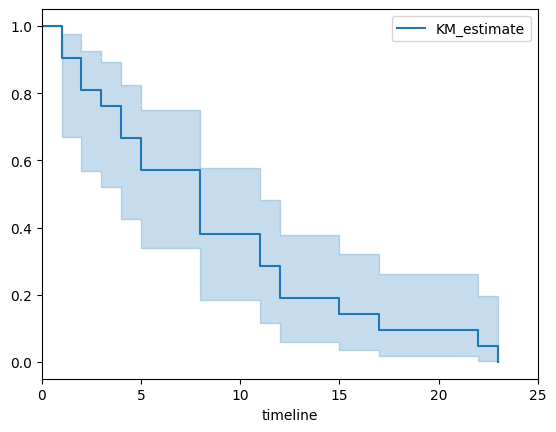

In [32]:
km_nodet.plot_survival_function()
plt.xlim(0,25)

In [36]:
km_det.median_survival_time_

23.0

In [35]:
km_nodet.median_survival_time_

8.0

In [41]:
#prueba de hipotesis (log rank test)\
$ H0: s(1) = s(2) $ funciones de supervivenci igaules
$ Ha: s(1) \neq s(2) $ funciones de supervicencia distinta

SyntaxError: invalid syntax (3407252213.py, line 2)

In [45]:
LRT=logrank_test(detallista['t'],no_detallista['t'],detallista['estado'],no_detallista['estado'])
LRT.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

In [49]:
LRT.p_value.round(2)

0.0

Con un alpha de 5% se rechaza H0 lo que significa que las funciones no son iguales